Pymaceuticals Inc.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
full_study_data = pd.merge(study_results, mouse_metadata, how = 'left')
full_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
#study_by_timepoint = full_study_data.sort_values(by=['Timepoint'], ascending=True)
#study_by_timepoint

In [7]:
mice_subject_count = len(full_study_data["Mouse ID"].unique())
print(mice_subject_count)

249


In [8]:
duplicate_id = full_study_data.loc[full_study_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_id

array(['g989'], dtype=object)

In [9]:
#Optional 

In [10]:
mouse_study_data_clean = full_study_data[full_study_data['Mouse ID'].isin(duplicate_id)==False]
mouse_study_data_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
mice_subject_count_clean = len(mouse_study_data_clean["Mouse ID"].unique())
print(mice_subject_count_clean)

248


Summary Statistics

In [14]:
mean_tumor_df = full_study_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median_tumor_df = full_study_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
var_tumor_df = full_study_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
std_tumor_df = full_study_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem_tumor_df = full_study_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

In [15]:
df1 = pd.merge(mean_tumor_df, median_tumor_df, how='left', on=['Drug Regimen'])
df2 = pd.merge(var_tumor_df, std_tumor_df, how='left', on=['Drug Regimen'])
df3 = pd.merge(df1, df2, how='left', on=['Drug Regimen'])
summary_data = df3.merge(sem_tumor_df, how='left', on=['Drug Regimen'])

In [16]:
summary_data_df = summary_data.rename(columns=
                                      {
                                          "Tumor Volume (mm3)_x_x": "Medain Tumor Volume",
                                          "Tumor Volume (mm3)_y_x": "Median Tumor Volume",
                                          "Tumor Volume (mm3)_x_y": "Tumor Volume Variance",
                                          "Tumor Volume (mm3)_y_y": "Tumor Volume Std. Dev.",
                                          "Tumor Volume (mm3)": "Tumor Volume Std. Err"
                                      }
                                     )

In [17]:
summary_data_df

,Medain Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Bar and Pie Charts

In [18]:
bar_chart_df = full_study_data.groupby(['Drug Regimen'])['Timepoint'].count()
bar_chart_df

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

<BarContainer object of 10 artists>

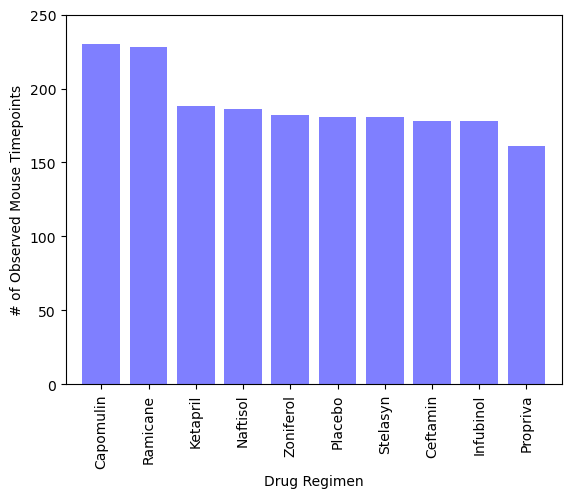

In [19]:
Timepoints = [230,228,188,186,182,181,181,178,178,161]
x_axis = np.arange(len(bar_chart_df))

tick_location = [value for value in x_axis]
plt.xticks(tick_location, ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Ceftamin", "Infubinol", "Propriva"])
plt.xticks(rotation=90)

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(Timepoints)+20)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.bar(x_axis, Timepoints, color='b', alpha=0.5, align="center")

In [20]:
mouse_pie_df= mouse_metadata.groupby(['Sex'])['Mouse ID'].count() / mice_subject_count
mouse_pie_df

Sex
Female    0.497992
Male      0.502008
Name: Mouse ID, dtype: float64

([<matplotlib.patches.Wedge at 0x1e89be170a0>,
 [Text(-0.034551802045584716, 1.0994572174374968, 'Male'),
  Text(0.03455180204558458, -1.0994572174374968, 'Female')],
 [Text(-0.018846437479409842, 0.5997039367840891, '51.0%'),
  Text(0.01884643747940977, -0.5997039367840891, '49.0%')])

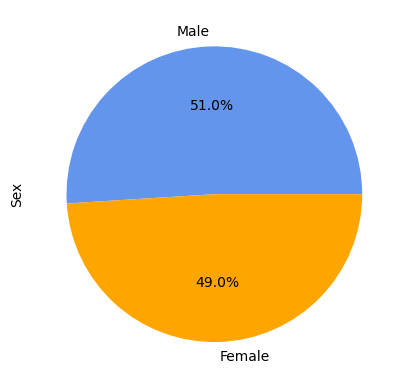

In [21]:
labels = ["Male", "Female"]
values = [51, 49]
colors = ["cornflowerblue", "orange"]
explode = (0, 0)

plt.ylabel("Sex")

plt.pie(values, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=0)

Quartiles, Outliers, and Boxplots

In [22]:
max_timepoints_df = study_results.groupby(['Mouse ID'])['Timepoint'].max()
max_timepoints_df.tail()

Mouse ID
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, dtype: int64

In [23]:
boxplot_df = pd.merge(max_timepoints_df, full_study_data, how="left", on=["Mouse ID", "Timepoint"])
#boxplot_df = boxplot_df.rename(columns={'Timepoint_x': "Timepoint", 'Timepoint_y': "Last/Greatest Timepoint"})
boxplot_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [24]:
treatment = [
    "Capomulin", 
    "Ramicane", 
    "Ceftamin", 
    "Infubinol", 
 ]

empty_plotting_list = []
#drug = "Capomulin"
for drug in treatment:
    drug_tumor_vol = boxplot_df.loc[boxplot_df['Drug Regimen']== drug,'Tumor Volume (mm3)']
    empty_plotting_list.append(drug_tumor_vol)
    
    quartiles = drug_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    drug_boxplot_data = drug_tumor_vol.loc[(drug_tumor_vol < lower_bound) | (drug_tumor_vol > upper_bound)]
    print(f" The Outliers for {drug} are {drug_boxplot_data}.")

 The Outliers for Capomulin are Series([], Name: Tumor Volume (mm3), dtype: float64).
 The Outliers for Ramicane are Series([], Name: Tumor Volume (mm3), dtype: float64).
 The Outliers for Ceftamin are Series([], Name: Tumor Volume (mm3), dtype: float64).
 The Outliers for Infubinol are 31    36.321346
Name: Tumor Volume (mm3), dtype: float64.


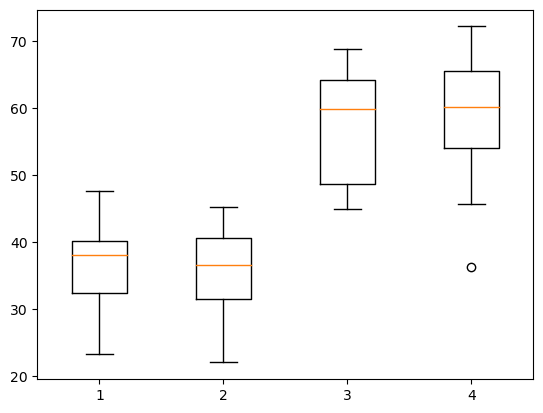

In [25]:
plt.boxplot(empty_plotting_list)
plt.show()

Line Graph

In [26]:
mouse = full_study_data.groupby('Mouse ID')
mouse_df = mouse.get_group('l509')
line_df = mouse_df.groupby('Timepoint')['Tumor Volume (mm3)'].mean()
line_df

Timepoint
0     45.000000
5     45.851193
10    46.759074
15    47.488599
20    48.070452
25    44.006257
30    44.708055
35    40.207288
40    40.770813
45    41.483008
Name: Tumor Volume (mm3), dtype: float64

<Axes: xlabel='Timepoint'>

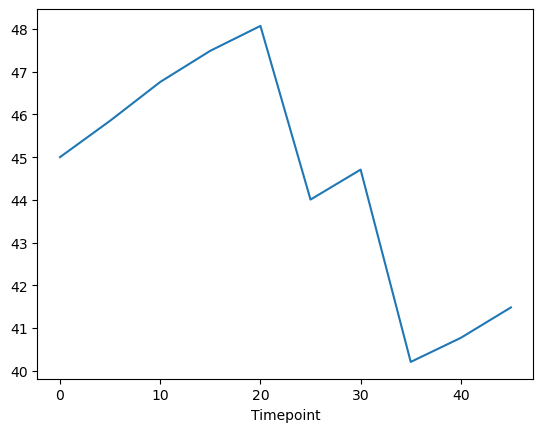

In [27]:
line_df.plot.line()
#plt.xlabel = ('Timepont (Days)')
#plt.ylabel = ('Tumor Volume (mm3)')
#plt.title = ('Capomulin treatment for mouse l509')

Scatter Plot

In [28]:
tumor = full_study_data.groupby('Drug Regimen')
tumor_df = tumor.get_group('Capomulin')
scatter_df = tumor_df.groupby(['Mouse ID', 'Weight (g)'], as_index=False)['Tumor Volume (mm3)'].mean()
scatter_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


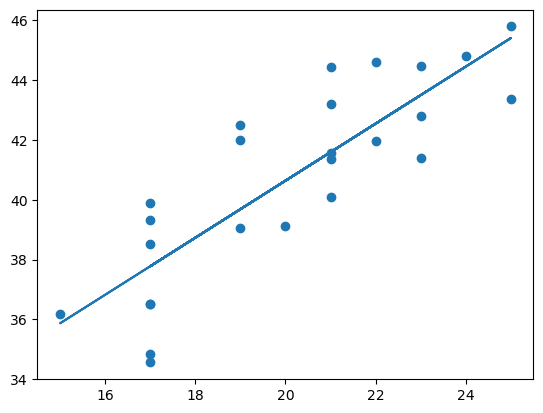

In [29]:
#x="Weight (g)"
#y="Tumor Value (mm3)"
x = scatter_df['Weight (g)']
y = scatter_df['Tumor Volume (mm3)']
plt.scatter(x, y)

#scatter_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=False, figsize=(8,8),)
(tw_slope, tw_int, tw_r, tw_p, tw_std_err) = st.linregress(x,y)
tw_fit = tw_slope*x + tw_int

plt.plot(x, tw_fit)